<a href="https://colab.research.google.com/github/darkfrozen158/05MIAR_04_A_2025-26_Aprendizaje-Supervisado/blob/main/PROYECTO/Actividad_Computer_Vision_C1_ChavezTrelles_CristianLeonardo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**CONVOCATORIA 1 - PROYECTO 1**




**CURSO: APRENDIZAJE SUPERVISADO**

**ALUMNO: CRISTIAN LEONARDO CHAVEZ TRELLES**

**LINK_GITHUB: https://github.com/darkfrozen158/05MIAR_04_A_2025-26_Aprendizaje-Supervisado/tree/main**

In [228]:
#Importamos las librerias a utilizar:
from skimage import io
import matplotlib.pyplot as plt
import numpy as np
import cv2


## **ANALIZANDO LA IMAGEN HISTO_1.jpg**

#### 0) Cargar una de las imágenes histológicas

Dimensiones de la imagen: (1024, 1024, 3)


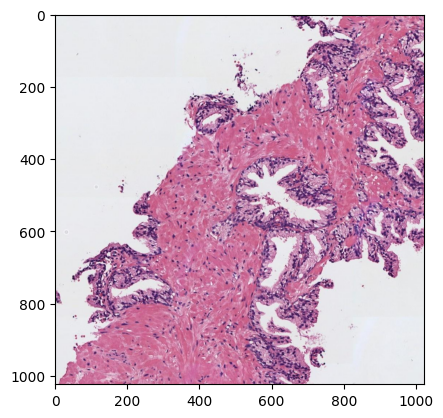

In [229]:
# Utilizar la librería skimage.io para leer la imagen 'histo_x.jpg' en formato RGB.
# Normalizar la imagen para que los píxeles se encuentren en el rango [0, 1]
# Visualizar la imagen
# Utilizar la librería skimage.io para leer la imagen 'histo_x.jpg' en formato RGB.

#definimos ruta de la imagen
archivo_histo_1 = '/content/histo_1.jpg'

#leemos la imagen
img_histo_1 = io.imread(archivo_histo_1)

#validamos dimensiones de la imagen
print("Dimensiones de la imagen:",img_histo_1.shape)

#normalización de la imagen
img_histo_1_normalizado = img_histo_1.astype(float)/255
plt.imshow(img_histo_1)
plt.show()


#### 1) Realizar una transformación de color para convertir la imagen al espacio de color CMYK

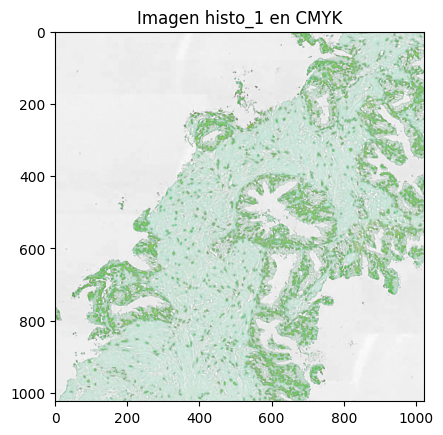

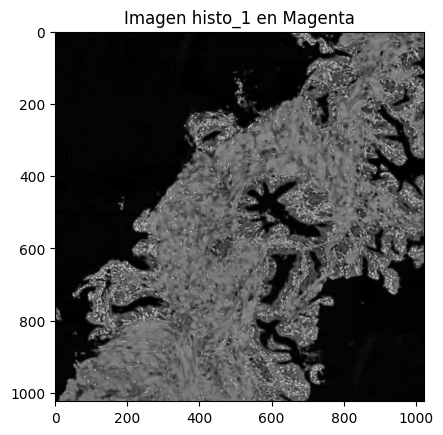

True

In [230]:
# Extraer la componente magenta de la imagen (que corresponde a la región tisular)
# Visualizar la imagen del canal magenta

#Realizamos la conversión de forma manualmente de la imagen de RGB a CMYK
with np.errstate(invalid='ignore', divide='ignore'):
    K = 1 - np.max(img_histo_1_normalizado, axis=2)
    C = (1-img_histo_1_normalizado[:,:,0] - K)/(1-K)
    M = (1-img_histo_1_normalizado[:,:,1] - K)/(1-K)
    Y = (1-img_histo_1_normalizado[:,:,2] - K)/(1-K)

#Obtenemos los valores correspondientes:
CMYK = (np.dstack((C,M,Y,K))*255).astype(np.uint8)
C,M,Y,K = cv2.split(CMYK)

#Visualizamos Resultados de ambas imagenes:
plt.title('Imagen histo_1 en CMYK')
plt.imshow(CMYK, cmap='gray')
plt.show()

plt.title('Imagen histo_1 en Magenta')
plt.imshow(M, cmap='gray')
plt.show()

#guardamos la imagen en MAGENTA:
cv2.imwrite('histo_1_magenta.png', M)


#### 2) Umbralizar la imagen para separar los píxeles del fondo de la región tisular

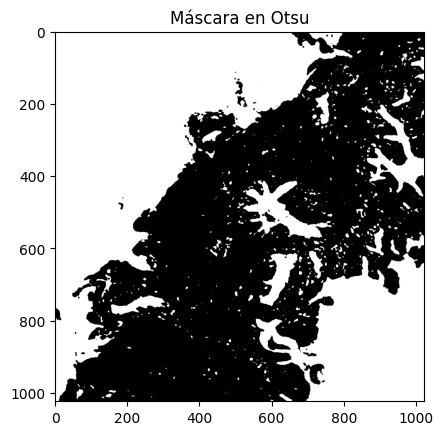

True

In [231]:
# Aplicar un filtro gaussiano de tamaño 5x5 y después utilizar el método de Otsu de manera que
# los píxeles correspondientes al lumen y al background de la imagen sean 1s y el resto de los píxeles tengan un valor de 0.
# Nota: Recordar que el método de Otsu requiere como input una imagen en el rango [0-255] en formato "uint8".
# Visualizar la máscara resultante

#Filtro gaussiano de 5x5 y 0 es la desviación estándar
imagen_gauss = cv2.GaussianBlur(M,(5,5),0)

#Aplicando Otsu
t, otsu_mask = cv2.threshold(imagen_gauss,0,1,cv2.THRESH_OTSU)
otsu_mask = (1-otsu_mask)

#Cambiamos el tipo de dato a formato "uint8".
otsu_mask = np.uint8(otsu_mask)

#Visualizamos los resultados:
plt.title('Máscara en Otsu')
plt.imshow(otsu_mask,cmap='gray')
plt.show()

#guardamos la imagen en Otsu:
cv2.imwrite('histo_1_mascara_otsu.png', otsu_mask)

#### 3) Limpiar la imagen eliminando los artefactos de lumen (objetos blancos pequeños que no son lúmenes)

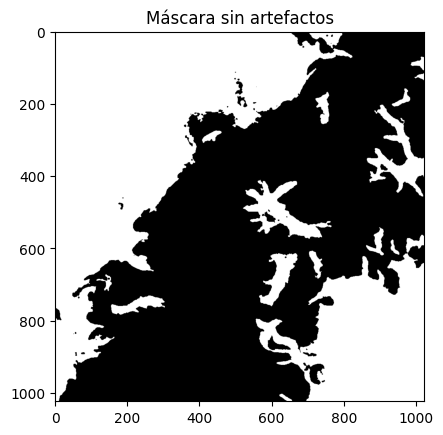

True

In [232]:
# Utilizar la librería skimage.morphology.remove_small_objects para eliminar aquellos objetos cuya área sea menor a 300 píxeles
# Más información en https://scikit-image.org/docs/dev/api/skimage.morphology.html#skimage.morphology.remove_small_objects
# Visualizaer la máscara resultante

#Importamos la libreria morphology de skimage
from skimage import morphology

#Convertir la matriz de imagen a binario
arr = otsu_mask > 0

#remover objetos de área de 300 píxeles
mask_2=morphology.remove_small_objects(arr,min_size=300)

#Visualizamos resultados.
plt.title('Máscara sin artefactos')
plt.imshow(mask_2,cmap='gray')
plt.show()

#Guardamos la imagen resultado
# Convertimos a uint8 antes de guardar la imagen
mask_2 = np.uint8(mask_2)
cv2.imwrite('histo_1_mascara_sin_artefactos.png', mask_2)

#### 4) Rellenar con 0s el fondo de la imagen para quedarnos únicamente con los lúmenes

**1-METODO ESTATICO:**

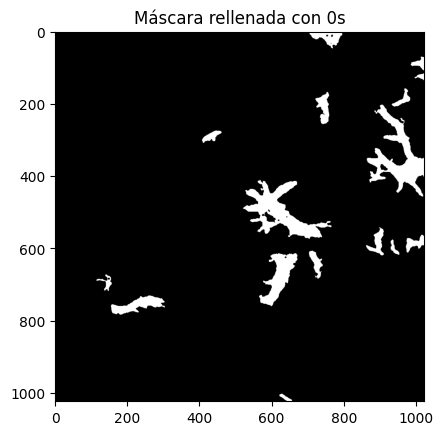

True

In [233]:
# Aplicar el algoritmo de expansión a partir de semillas (region growing) de manera que únicamente los lúmenes sean blancos
# y el resto de la imagen negra. Pista: utilizar dos semillas. Nota: Se pueden fijar las semillas de manera manual, pero
# se valorará positivamente a aquell@s que desarrollen una función para encontrarlas automáticamente.
# Visualizar la máscara resultante.

#Obtenemos la mascara sin efectivos
mask_3 = mask_2.copy()
# Convertimos a uint8
mask_3 = np.uint8(mask_3)
h, w = mask_3.shape
#referencia para rellenar de 0s
ref = np.zeros((h+2, w+2), np.uint8)

#Semillas
#Solo ocupar esta semilla para la imagen histo_1.png
cv2.floodFill(mask_3, ref, (0,0), 0) # Como nos interesa rellenar de negro, utilizamos el par 0,0 ya que nos hemos percato que es un punto donde se puede iniciar a rellenar con 0
# La segunda se pone el par 1000,1000, ya que la imagen se parte en 2, y la semilla no puede seguir buscando más regiones con 1
cv2.floodFill(mask_3, ref, (1000,1000), 0)

#Mostramos Resultados:
plt.title('Máscara rellenada con 0s')
plt.imshow(mask_3,cmap='gray')
plt.show()
#guardamos la imagen resultado.
cv2.imwrite('histo_1_mascara_rellenada_con_0s.png', mask_3)

**2-FUNCIÓN PARA BUSCAR AUTOMATICAMENTE LAS SEMILLAS:**

In [234]:
def ObtenerSemillasAutomaticamente(mask):
    # Asegurarse que la máscara esté en formato uint8
    mask_filled = mask.copy().astype('uint8')

    h, w = mask_filled.shape
    ref = np.zeros((h + 2, w + 2), np.uint8)  # Para floodFill

    # Buscar píxeles en los bordes que sean 1 y usarlos como semillas
    border_seeds = []

    # Borde superior e inferior
    for x in range(w):
        if mask_filled[0, x] == 1:
            border_seeds.append((x, 0))
        if mask_filled[h - 1, x] == 1:
            border_seeds.append((x, h - 1))

    # Borde izquierdo y derecho
    for y in range(h):
        if mask_filled[y, 0] == 1:
            border_seeds.append((0, y))
        if mask_filled[y, w - 1] == 1:
            border_seeds.append((w - 1, y))

    # Aplicar floodFill desde cada semilla
    for seed in border_seeds:
        cv2.floodFill(mask_filled, ref, seedPoint=seed, newVal=0)

    return mask_filled


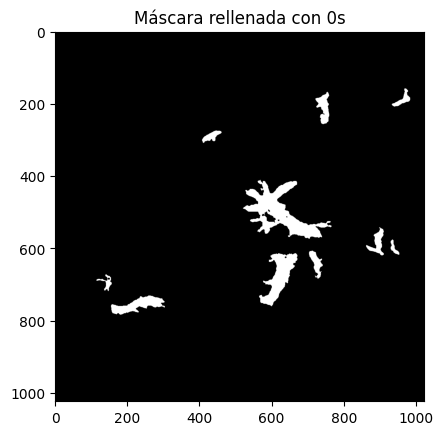

In [235]:
#Aplicacimos la función:
mask_3_v2 = ObtenerSemillasAutomaticamente(mask_3)

#Mostramos resultados:
plt.title('Máscara rellenada con 0s')
plt.imshow(mask_3_v2,cmap='gray')
plt.show()

#### 5) Rellenar los objetos de los lúmenes:

/tmp/ipython-input-2217863578.py:6: DeprecationWarning: Please import `binary_fill_holes` from the `scipy.ndimage` namespace; the `scipy.ndimage.morphology` namespace is deprecated and will be removed in SciPy 2.0.0.
  mask_4=ndimage.morphology.binary_fill_holes(mask_3)


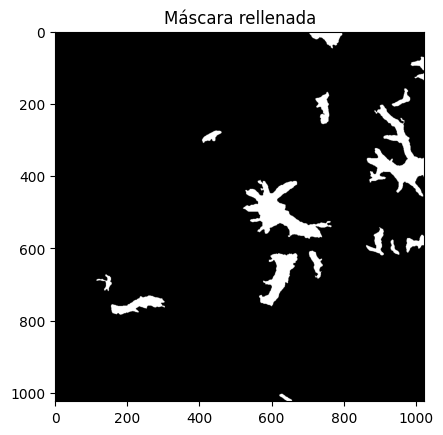

True

In [236]:
# Rellenar los lúmenes con la función binary_fill_holes de la librería scipy.ndimage.morphology
# Visualizar la máscara resultante
from scipy import ndimage

#Utilizamos una función de la libreriascipy
mask_4=ndimage.morphology.binary_fill_holes(mask_3)

#visualizamos los resultados:
plt.title('Máscara rellenada')
plt.imshow(mask_4,cmap='gray')
plt.show()

#Guardamos la imagen resultado
# Convertimos a uint8 antes de guardar la imagen
mask_4 = np.uint8(mask_4)
cv2.imwrite('histo_1_mascara_rellenada.png', mask_4)

#### 6) Detectar y dibujar los contornos de los lúmenes sobre la imagen original:

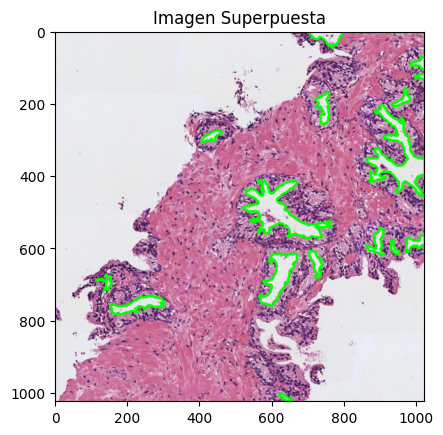

True

In [237]:
# Dibujar los contornos de los lúmenes en color verde sobre la imagen original RGB. Nota: Utilizar los flags necesarios
# para que los contornos en verde sean perfectamente visibles.
# Visualizar la imagen superpuesta

#Obtenemos la imagen inicial
img_superpuesta = img_histo_1.copy()

#Encontrar las areas donde se desea aplicar los contornos
contours,_ = cv2.findContours(mask_4.astype('uint8'),cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)

#Dibujar contornos
cv2.drawContours(img_superpuesta,contours,-1,(0,255,0),6)

# Visualizar la imagen resultado.
plt.title('Imagen Superpuesta')
plt.imshow(img_superpuesta,cmap='gray')
plt.show()

#Guardamos la imagen resultado
# Convertimos a uint8 antes de guardar la imagen
img_superpuesta = np.uint8(img_superpuesta)
cv2.imwrite('histo_1_imagen_superpuesta.png', img_superpuesta)

#### 7) Identificar y cropear el lumen más grande:

(412, 520, 575, 766)


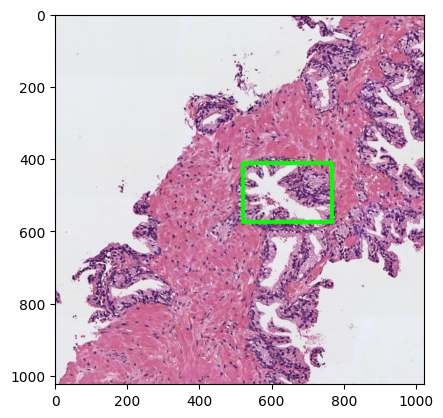

520


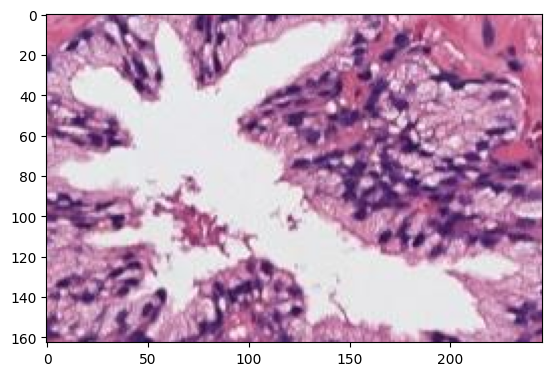

In [238]:
# Determinar cuál es el lumen de mayor área y hacer un crop del mismo sobre la imagen original RGB.
# Visualizar el lumen cropeado.

from skimage.measure import label
from skimage.measure import regionprops

#cada num tiene un grado de intensidad para cada imagen
lab, num = label(mask_4, return_num=True)

img_copy =img_histo_1.copy()
#Objeto donde se guardara el objeto de mayor área
obj_mayor_area = {}
area = 0

for i in range(1,num+1):
    objeto = lab == i
    prop = regionprops(objeto.astype(np.uint8))

    #Obteniendo las areas de todos los objetos
    #y obteniendo la mayor área de los objetos de la imagen
    if(area<np.round(prop[0].area, 4)):
      area = np.round(prop[0].area, 4)
      obj_mayor_area = objeto


obj_mayor_area = obj_mayor_area.astype('uint8')
bbox = regionprops(obj_mayor_area)[0].bbox
print(bbox)
start_point = (bbox[1], bbox[0])
end_point = (bbox[3], bbox[2])
#Dibujando un rectangulo sobre el objeto que tiene mayor área
window = cv2.rectangle(img_copy, start_point, end_point, (0, 255, 0), 10)

plt.imshow(window, cmap='gray')
plt.show()

##Crop image
x,y,w,h = bbox
print(y)
img_crop=img_histo_1[x:w, y:h]
plt.imshow(img_crop, cmap='gray')
plt.show()

#### 8) Extraer 13 características geométricas que permitan caracterizar el lumen recortado

In [239]:
# Calcular las siguientes características del crop del lumen de mayor área, redondeando su valor hasta el cuarto decimal.
from tabulate import tabulate
import math



# 1) Área
# 2) Área de la bounding box
# 3) Área convexa
# 4) Exentricidad
# 5) Diámetro equivalente
# 6) Extensión
# 7) Diámetro Feret
# 8) Longitud del eje mayor
# 9) Longitud del eje menor
# 10) Orientación
# 11) Perímetro
# 12) Solidez
# 13) Compacidad

headers = ['','Lumen mayor área']
A,BB,CA,E,ED,EX,DF,MA,MiA,OR,P,S,CO = ['Área'], ['Área de la bounding box'], ['Área convexa'], ['Exentricidad'], ['Diámetro equivalente'], \
['Extensión'], ['Diámetro Feret'],['Longitud del eje mayor'], ['Longitud del eje menor'], ['Orientación'], ['Perímetro'], ['Solidez'], ['Compacidad']

prop = regionprops(obj_mayor_area)

A.append(np.round(prop[0].area, 4))
BB.append(np.round(prop[0].bbox_area, 4))
CA.append(np.round(prop[0].convex_area, 4))
E.append(np.round(prop[0].eccentricity, 4))
ED.append(np.round(prop[0].equivalent_diameter, 4))
DF.append(np.round(prop[0].feret_diameter_max, 4))
EX.append(np.round(prop[0].extent, 4))
MA.append(np.round(prop[0].major_axis_length, 4))
MiA.append(np.round(prop[0].minor_axis_length, 4))
OR.append(np.round(prop[0].orientation, 4))
P.append(np.round(prop[0].perimeter, 4))
S.append(np.round(prop[0].solidity, 4))
CO.append(np.round(4*math.pi*prop[0].area/prop[0].perimeter**2, 4))



my_data = [tuple(A), tuple(BB), tuple(CA), tuple(E), tuple(ED), tuple(EX), tuple(DF), \
          tuple(MA), tuple(MiA), tuple(OR), tuple(P), tuple(S), tuple(CO)]

print(tabulate(my_data, headers=headers))

                           Lumen mayor área
-----------------------  ------------------
Área                             14110
Área de la bounding box          40098
Área convexa                     29267
Exentricidad                         0.847
Diámetro equivalente               134.035
Extensión                            0.3519
Diámetro Feret                     259.077
Longitud del eje mayor             238.527
Longitud del eje menor             126.796
Orientación                          1.0052
Perímetro                         1238.32
Solidez                              0.4821
Compacidad                           0.1156


# **ANALIZANDO LA IMAGEN HISTO_2.jpg**

#### 0) Cargar una de las imágenes histológicas

Dimensiones de la imagen: (1024, 1024, 3)


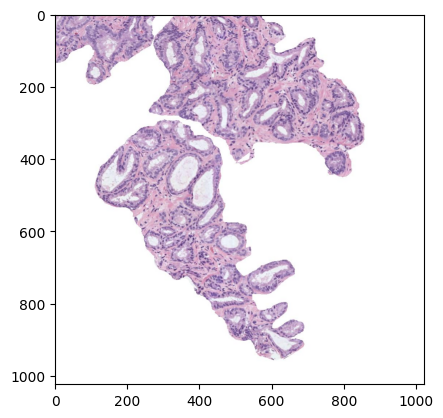

In [240]:
# Utilizar la librería skimage.io para leer la imagen 'histo_x.jpg' en formato RGB.
# Normalizar la imagen para que los píxeles se encuentren en el rango [0, 1]
# Visualizar la imagen
# Utilizar la librería skimage.io para leer la imagen 'histo_x.jpg' en formato RGB.

#definimos ruta de la imagen
archivo_histo_2 = '/content/histo_2.jpg'

#leemos la imagen
img_histo_2 = io.imread(archivo_histo_2)

#validamos dimensiones de la imagen
print("Dimensiones de la imagen:",img_histo_2.shape)

#normalización de la imagen
img_histo_2_normalizado = img_histo_2.astype(float)/255
plt.imshow(img_histo_2_normalizado)
plt.show()

#### **1) Realizar una transformación de color para convertir la imagen al espacio de color CMYK**

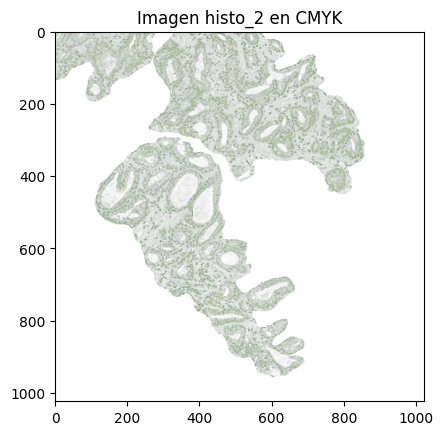

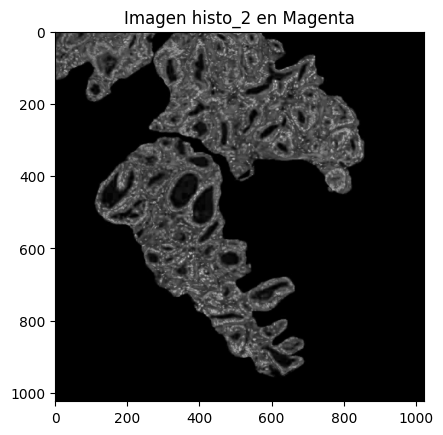

True

In [241]:
# Extraer la componente magenta de la imagen (que corresponde a la región tisular)
# Visualizar la imagen del canal magenta

#Realizamos la conversión de forma manualmente de la imagen de RGB a CMYK
with np.errstate(invalid='ignore', divide='ignore'):
    K = 1 - np.max(img_histo_2_normalizado, axis=2)
    C = (1-img_histo_2_normalizado[:,:,0] - K)/(1-K)
    M = (1-img_histo_2_normalizado[:,:,1] - K)/(1-K)
    Y = (1-img_histo_2_normalizado[:,:,2] - K)/(1-K)

#Obtenemos los valores correspondientes:
CMYK = (np.dstack((C,M,Y,K))*255).astype(np.uint8)
C_2,M_2,Y_2,K_2 = cv2.split(CMYK)

#Visualizamos Resultados de ambas imagenes:
plt.title('Imagen histo_2 en CMYK')
plt.imshow(CMYK, cmap='gray')
plt.show()

plt.title('Imagen histo_2 en Magenta')
plt.imshow(M_2, cmap='gray')
plt.show()

#guardamos la imagen en MAGENTA:
cv2.imwrite('histo_2_magenta.png', M_2)


#### 2) Umbralizar la imagen para separar los píxeles del fondo de la región tisular

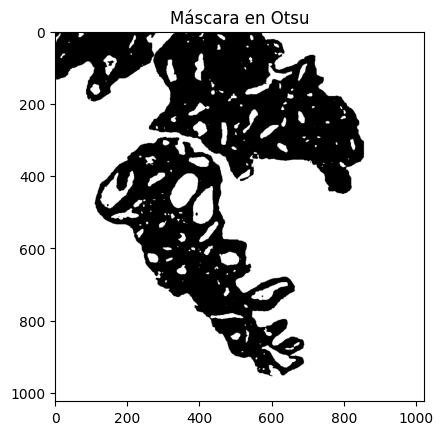

True

In [242]:
# Aplicar un filtro gaussiano de tamaño 5x5 y después utilizar el método de Otsu de manera que
# los píxeles correspondientes al lumen y al background de la imagen sean 1s y el resto de los píxeles tengan un valor de 0.
# Nota: Recordar que el método de Otsu requiere como input una imagen en el rango [0-255] en formato "uint8".
# Visualizar la máscara resultante

#Filtro gaussiano de 5x5 y 0 es la desviación estándar
imagen_gauss = cv2.GaussianBlur(M_2,(5,5),0)

#Aplicando Otsu
t, otsu_mask_2 = cv2.threshold(imagen_gauss,0,1,cv2.THRESH_OTSU)
otsu_mask_2 = (1-otsu_mask_2)

#Cambiamos el tipo de dato a formato "uint8".
otsu_mask_2 = np.uint8(otsu_mask_2)

#Visualizamos los resultados:
plt.title('Máscara en Otsu')
plt.imshow(otsu_mask_2,cmap='gray')
plt.show()

#guardamos la imagen en Otsu:
cv2.imwrite('histo_1_mascara_otsu.png', otsu_mask_2)

#### 3) Limpiar la imagen eliminando los artefactos de lumen (objetos blancos pequeños que no son lúmenes)

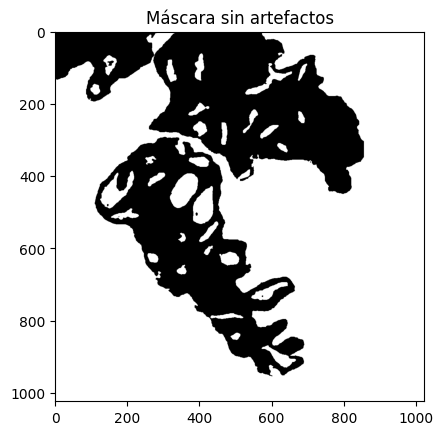

True

In [243]:
# Utilizar la librería skimage.morphology.remove_small_objects para eliminar aquellos objetos cuya área sea menor a 300 píxeles
# Más información en https://scikit-image.org/docs/dev/api/skimage.morphology.html#skimage.morphology.remove_small_objects
# Visualizaer la máscara resultante

#Importamos la libreria morphology de skimage
from skimage import morphology

#Convertir la matriz de imagen a binario
arr = otsu_mask_2 > 0

#remover objetos de área de 300 píxeles
mask_histo2=morphology.remove_small_objects(arr,min_size=300)

#Visualizamos resultados.
plt.title('Máscara sin artefactos')
plt.imshow(mask_histo2,cmap='gray')
plt.show()

#Guardamos la imagen resultado
# Convertimos a uint8 antes de guardar la imagen
mask_histo2 = np.uint8(mask_histo2)
cv2.imwrite('histo_1_mascara_sin_artefactos.png', mask_histo2)

#### 4) Rellenar con 0s el fondo de la imagen para quedarnos únicamente con los lúmenes

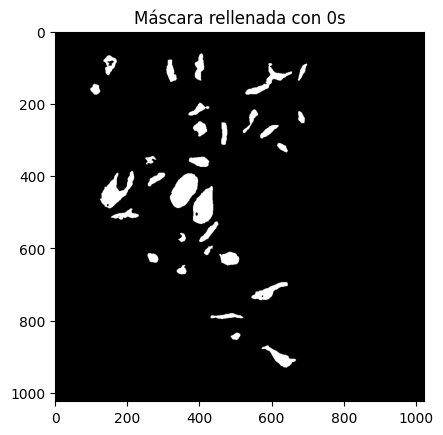

True

In [244]:
# Aplicar el algoritmo de expansión a partir de semillas (region growing) de manera que únicamente los lúmenes sean blancos
# y el resto de la imagen negra. Pista: utilizar dos semillas. Nota: Se pueden fijar las semillas de manera manual, pero
# se valorará positivamente a aquell@s que desarrollen una función para encontrarlas automáticamente.
# Visualizar la máscara resultante.

#Obtenemos la mascara sin efectivos
mask_3_histo2 = mask_histo2.copy()
# Convertimos a uint8
mask_3_histo2 = np.uint8(mask_3_histo2)
h, w = mask_3_histo2.shape
#referencia para rellenar de 0s
ref = np.zeros((h+2, w+2), np.uint8)

#Semillas
#Solo ocupar esta semilla para la imagen histo_1.png
cv2.floodFill(mask_3_histo2, ref, (0,0), 0) # Como nos interesa rellenar de negro, utilizamos el par 0,0 ya que nos hemos percato que es un punto donde se puede iniciar a rellenar con 0
# La segunda se pone el par 1000,1000, ya que la imagen se parte en 2, y la semilla no puede seguir buscando más regiones con 1
cv2.floodFill(mask_3_histo2, ref, (1000,1000), 0)

#Mostramos Resultados:
plt.title('Máscara rellenada con 0s')
plt.imshow(mask_3_histo2,cmap='gray')
plt.show()
#guardamos la imagen resultado.
cv2.imwrite('histo_1_mascara_rellenada_con_0s.png', mask_3_histo2)

#### 5) Rellenar los objetos de los lúmenes:

/tmp/ipython-input-2740969368.py:6: DeprecationWarning: Please import `binary_fill_holes` from the `scipy.ndimage` namespace; the `scipy.ndimage.morphology` namespace is deprecated and will be removed in SciPy 2.0.0.
  mask_4_histo2=ndimage.morphology.binary_fill_holes(mask_3_histo2)


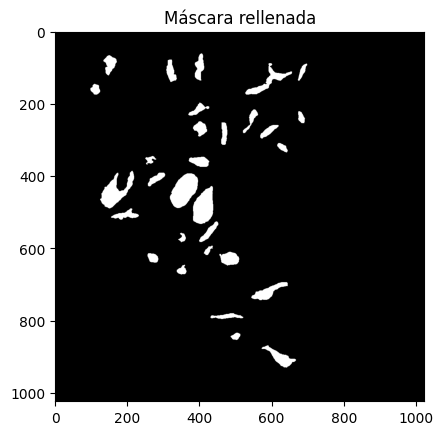

True

In [245]:
# Rellenar los lúmenes con la función binary_fill_holes de la librería scipy.ndimage.morphology
# Visualizar la máscara resultante
from scipy import ndimage

#Utilizamos una función de la libreriascipy
mask_4_histo2=ndimage.morphology.binary_fill_holes(mask_3_histo2)

#visualizamos los resultados:
plt.title('Máscara rellenada')
plt.imshow(mask_4_histo2,cmap='gray')
plt.show()

#Guardamos la imagen resultado
# Convertimos a uint8 antes de guardar la imagen
mask_4_histo2 = np.uint8(mask_4_histo2)
cv2.imwrite('histo_1_mascara_rellenada.png', mask_4_histo2)

#### 6) Detectar y dibujar los contornos de los lúmenes sobre la imagen original:

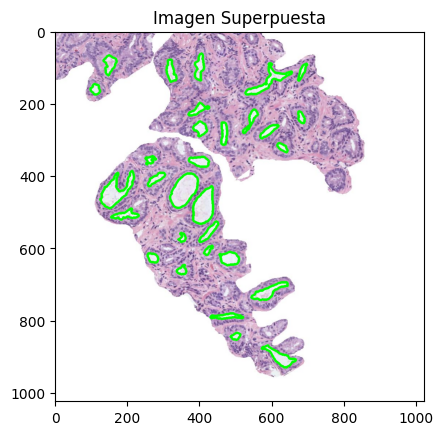

True

In [246]:
# Dibujar los contornos de los lúmenes en color verde sobre la imagen original RGB. Nota: Utilizar los flags necesarios
# para que los contornos en verde sean perfectamente visibles.
# Visualizar la imagen superpuesta

#Obtenemos la imagen inicial
img_superpuesta = img_histo_2.copy()

#Encontrar las areas donde se desea aplicar los contornos
contours,_ = cv2.findContours(mask_4_histo2.astype('uint8'),cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)

#Dibujar contornos
cv2.drawContours(img_superpuesta,contours,-1,(0,255,0),6)

# Visualizar la imagen resultado.
plt.title('Imagen Superpuesta')
plt.imshow(img_superpuesta,cmap='gray')
plt.show()

#Guardamos la imagen resultado
# Convertimos a uint8 antes de guardar la imagen
img_superpuesta = np.uint8(img_superpuesta)
cv2.imwrite('histo_1_imagen_superpuesta.png', img_superpuesta)

#### 7) Identificar y cropear el lumen más grande:

(394, 318, 490, 396)


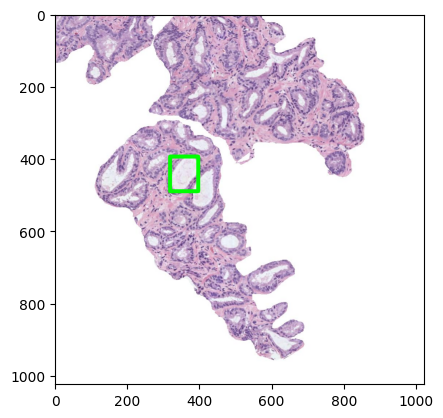

318


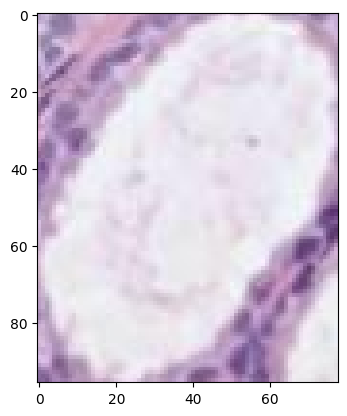

In [247]:
# Determinar cuál es el lumen de mayor área y hacer un crop del mismo sobre la imagen original RGB.
# Visualizar el lumen cropeado.

from skimage.measure import label
from skimage.measure import regionprops

#cada num tiene un grado de intensidad para cada imagen
lab, num = label(mask_4_histo2, return_num=True)

img_copy =img_histo_2.copy()
#Objeto donde se guardara el objeto de mayor área
obj_mayor_area = {}
area = 0

for i in range(1,num+1):
    objeto = lab == i
    prop = regionprops(objeto.astype(np.uint8))

    #Obteniendo las areas de todos los objetos
    #y obteniendo la mayor área de los objetos de la imagen
    if(area<np.round(prop[0].area, 4)):
      area = np.round(prop[0].area, 4)
      obj_mayor_area = objeto


obj_mayor_area = obj_mayor_area.astype('uint8')
bbox = regionprops(obj_mayor_area)[0].bbox
print(bbox)
start_point = (bbox[1], bbox[0])
end_point = (bbox[3], bbox[2])
#Dibujando un rectangulo sobre el objeto que tiene mayor área
window = cv2.rectangle(img_copy, start_point, end_point, (0, 255, 0), 10)

plt.imshow(window, cmap='gray')
plt.show()

##Crop image
x,y,w,h = bbox
print(y)
img_crop=img_histo_2[x:w, y:h]
plt.imshow(img_crop, cmap='gray')
plt.show()

#### 8) Extraer 13 características geométricas que permitan caracterizar el lumen recortado :

In [248]:
# Calcular las siguientes características del crop del lumen de mayor área, redondeando su valor hasta el cuarto decimal.
from tabulate import tabulate
import math

# 1) Área
# 2) Área de la bounding box
# 3) Área convexa
# 4) Exentricidad
# 5) Diámetro equivalente
# 6) Extensión
# 7) Diámetro Feret
# 8) Longitud del eje mayor
# 9) Longitud del eje menor
# 10) Orientación
# 11) Perímetro
# 12) Solidez
# 13) Compacidad

#Creamos las cabeceras
headers = ['','Lumen mayor área']

#Creamos las variables:
A,BB,CA,E,ED,EX,DF,MA,MiA,OR,P,S,CO = ['Área'], ['Área de la bounding box'], ['Área convexa'], ['Exentricidad'], ['Diámetro equivalente'], \
['Extensión'], ['Diámetro Feret'],['Longitud del eje mayor'], ['Longitud del eje menor'], ['Orientación'], ['Perímetro'], ['Solidez'], ['Compacidad']

#ejecutamos la función
prop = regionprops(obj_mayor_area)

#asignamos los valores de cada variable
A.append(np.round(prop[0].area, 4))
BB.append(np.round(prop[0].bbox_area, 4))
CA.append(np.round(prop[0].convex_area, 4))
E.append(np.round(prop[0].eccentricity, 4))
ED.append(np.round(prop[0].equivalent_diameter, 4))
DF.append(np.round(prop[0].feret_diameter_max, 4))
EX.append(np.round(prop[0].extent, 4))
MA.append(np.round(prop[0].major_axis_length, 4))
MiA.append(np.round(prop[0].minor_axis_length, 4))
OR.append(np.round(prop[0].orientation, 4))
P.append(np.round(prop[0].perimeter, 4))
S.append(np.round(prop[0].solidity, 4))
CO.append(np.round(4*math.pi*prop[0].area/prop[0].perimeter**2, 4))


#Diseñamos la tabla
my_data = [tuple(A), tuple(BB), tuple(CA), tuple(E), tuple(ED), tuple(EX), tuple(DF), \
          tuple(MA), tuple(MiA), tuple(OR), tuple(P), tuple(S), tuple(CO)]

#Mostrar Resultados
print(tabulate(my_data, headers=headers))

                           Lumen mayor área
-----------------------  ------------------
Área                              4887
Área de la bounding box           7488
Área convexa                      5020
Exentricidad                         0.8355
Diámetro equivalente                78.8817
Extensión                            0.6526
Diámetro Feret                     105.679
Longitud del eje mayor             106.646
Longitud del eje menor              58.5958
Orientación                         -0.5612
Perímetro                          280.392
Solidez                              0.9735
Compacidad                           0.7811
